# Final Project

## Clustering: Real vs. Random

In this assignment, you will be asked to calculate a particular graph parameter on a real social network dataset and compare it to the value of the same parameter on a randomly generated graph. The parameter is the average clustering coefficient ("ACC" for short)which is computed as the mean value of local clustering coefficients for all vertices in the graph. The ACC is computed in NetwortkX using a dedicated function:

```
acc = nx.average_clustering(G)
```

The program you write should do the following.

Read the example of the social network graph from the SNAP dataset (facebook_combined.txt)

Compute the ACC for this graph.

Compute the probability of an edge between two random vertices in the graph, by dividing the number of edges by the maximal possible number of edges. Denote this probability by P.

Generate an Erdős–Rényi random graph with the same number of vertices as the original graph. An edge between two vertices is drawn with probability P (and not drawn with probability (1-P)), independently for each pair of vertices.

Compute the ACC for the random graph.

Compare the results.

The resulting output should consist of two numbers, the ACC of the original graph and the ACC of the random graph. For debugging purposes, it is useful to see other parameters, such as the number of edges in the random graph (it should be close to the number of edges in the original graph).

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from random import random

In [6]:
# Read data from the dataset, and create graph G_fb
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int);

print("--- Info from facebook_combined graph ---")

# Number of nodes in G_fb
num_nodes = G_fb.number_of_nodes()
print("Nº of nodes: " + str(num_nodes));

# Number of edges in G_fb
num_edges = G_fb.number_of_edges()
print("Nº of edges: " + str(num_edges));

# General info of G_fb
print("Density: " + str(nx.density(G_fb)))
ecc = nx.eccentricity(G_fb)
print("Diameter: " + str(nx.diameter(G_fb, e=ecc)))
print("Radius: " + str(nx.radius(G_fb, e=ecc)))

--- Info from facebook_combined graph ---
Nº of nodes: 4039
Nº of edges: 88234
Density: 0.010819963503439287
Diameter: 8
Radius: 4


In [7]:
# TASK1. Now your task is to compute the probability whether there is an edge between two vertices.
total_edges = (num_nodes * (num_nodes - 1))/2
print("Total edges possible: " + str(total_edges))

edge_probab = num_edges/total_edges
print("Edge propability between 2 nodes: " + str(edge_probab))  # Same value as density

Total edges possible: 8154741.0
Edge propability between 2 nodes: 0.010819963503439287


In [8]:
# TASK2. Compute the ACC (average clustering coefficient) of G_fb
av_clust_coeff_G_fb = nx.average_clustering(G_fb)
print("Clustering coefficient for G_fb: " + str(av_clust_coeff_G_fb))

Clustering coefficient for G_fb: 0.6055467186200876


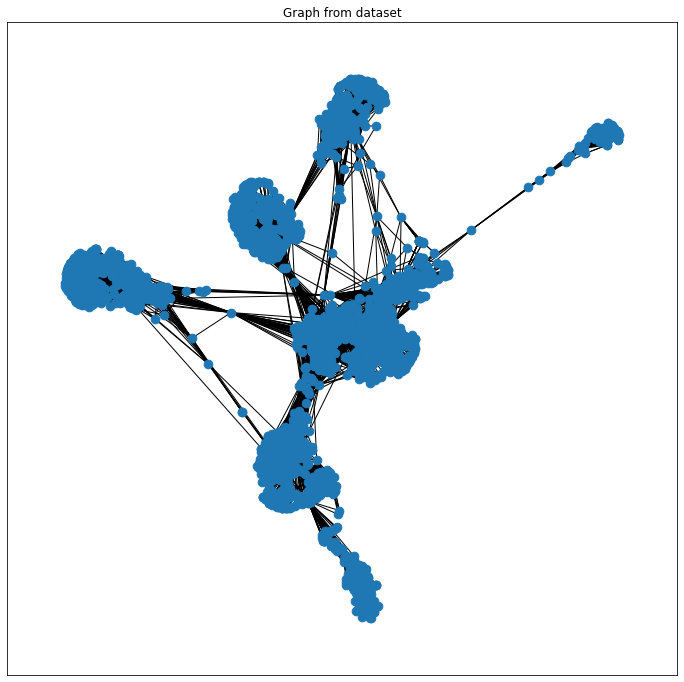

In [9]:
# Print the dataset graph
plt.figure(num=1, figsize=(12, 12))
plt.title('Graph from dataset')
nx.draw_networkx(G_fb, node_shape='.', with_labels=False, pos=nx.spring_layout(G_fb))

<function matplotlib.pyplot.show>

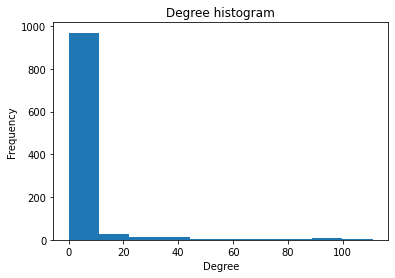

In [10]:
# Print the degree histogram
degree_freq = nx.degree_histogram(G_fb)
degrees = range(len(degree_freq))

plt.title('Degree histogram')
plt.figure(num=1, figsize=(12,12))
#plt.loglog(degrees, degree_freq, 'go-') 
plt.hist(degree_freq)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show

In [11]:
# TASK3. generate edges in G_rand at random.

# First we have to generate a Erdős–Rényi random graph
G_rand = nx.erdos_renyi_graph(num_nodes, edge_probab)
        
print("--- Info from Erdős–Rényi random graph ---")

# Now we print out the number of nodes and edges of the random graph
print("Nº of nodes: " + str(G_rand.number_of_nodes()));
print("Nº of edges: " + str(G_rand.number_of_edges()));

# General info of the random graph
print("Density: " + str(nx.density(G_rand)))
ecc = nx.eccentricity(G_rand)
print("Diameter: " + str(nx.diameter(G_rand, e=ecc)))
print("Radius: " + str(nx.diameter(G_rand, e=ecc)))

# Print out the ACC of the random graph
av_clust_coeff_G_rand = nx.average_clustering(G_rand)
print("Clustering coefficient: " + str(av_clust_coeff_G_rand));

--- Info from Erdős–Rényi random graph ---
Nº of nodes: 4039
Nº of edges: 88092
Density: 0.010802550320114398
Diameter: 4
Radius: 4
Clustering coefficient: 0.010859027060480968


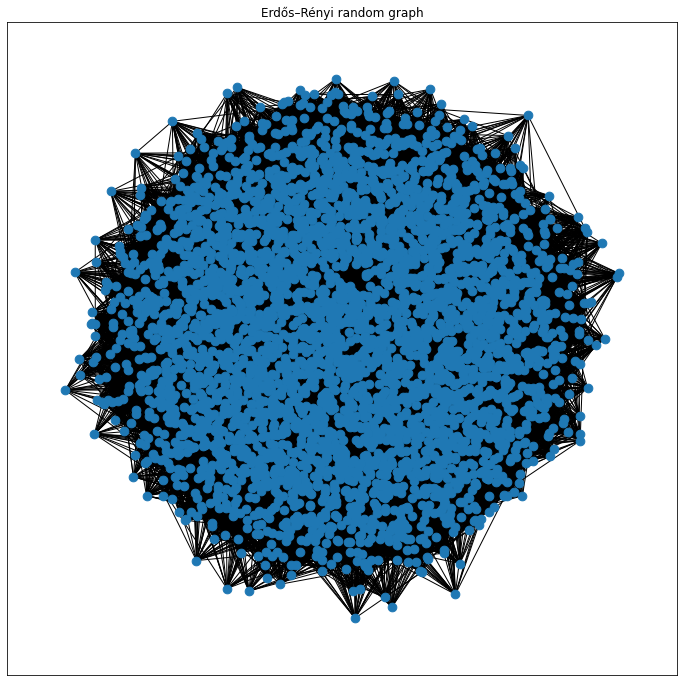

In [12]:
# Print random graph
plt.figure(num=1, figsize=(12, 12))
plt.title('Erdős–Rényi random graph')
nx.draw_networkx(G_rand, node_shape='.', with_labels=False, pos=nx.spring_layout(G_rand))

<function matplotlib.pyplot.show>

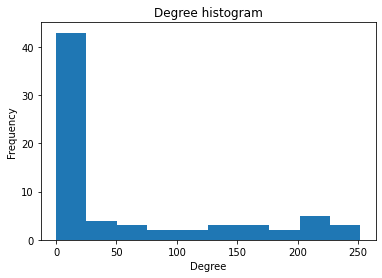

In [13]:
# Print the degree histogram
degree_freq = nx.degree_histogram(G_rand)
degrees = range(len(degree_freq))

plt.title('Degree histogram')
plt.figure(num=1, figsize=(12,12))
#plt.loglog(degrees, degree_freq, 'go-') 
plt.hist(degree_freq)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show

Text(0, 0.5, 'Frequency')

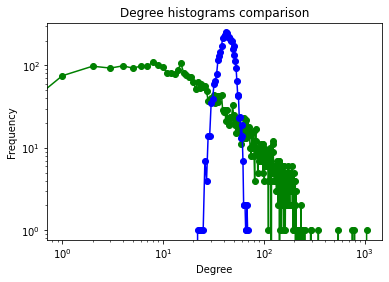

In [14]:
# Compares both degree histogram
degree_freq_G_fb = nx.degree_histogram(G_fb)
degree_freq_G_rand = nx.degree_histogram(G_rand)
if (degree_freq_G_fb >= degree_freq_G_rand): 
  degrees = degree_freq_G_fb
else: 
  degrees = degree_freq_G_rand

plt.title('Degree histograms comparison')
plt.figure(num=1, figsize=(12, 12)) 
plt.loglog(range(len(degree_freq_G_fb)), degree_freq_G_fb, 'go-', label='degree-G_fb') 
plt.loglog(range(len(degree_freq_G_rand)), degree_freq_G_rand, 'bo-', label='degree-G_rand')
plt.xlabel('Degree')
plt.ylabel('Frequency')

As shown by the different shapes and ACCs from the original graph and the random one, although the random graph has the same number of nodes and almost the same number of vertices, their shapes are completely different.

As the random graph uses only the number of nodes and the probability of an edge in the original graph to build the connections between vertices, it does not represent the cluestering tendecy that exists in the original graph. And the ACC represents it very well, in the original graph it is equal to 0.60, and in the random graph the ACC is almost equal to the edge probability.

The diameter/radius comparison also gives us an evidence of the impact caused by the difference in the ACC value between the graphs. In the original and more cluesterized graph, the diameter is twice the radius value, while in the random graph we have diameter equals radius.

Finally, the histogram of both graphs shows us that in a more clusterized graph there are more vertices with a low number of edges and the range of degree frequency is also higher.

# Misc about concepts learned during the course

In [15]:
i = 0
for a in range(1,1001):
    if (a%2==0) | (a%3==0):
      i += 1
print(i)

667


In [16]:
i = 0
for _ in range(4):
        for _ in range(8):
                #print("Hello world!")
                i += 1
print(i)

32


In [17]:
i = 0
for _ in range(2):
        for _ in range(7):
                for _ in range(3):
                        #print("Hello world!")
                        i += 1
print(i)

42


In [18]:
i = 0
for _ in range(4):
        for _ in range(4):
                #print("Hello world!")
                i += 1
for _ in range(7):
        for _ in range(3):
                #print("Hello world!")
                i += 1
print(i)

37


In [19]:
n=8
count = 0

for i in range(n):
    for j in range(n):
        for k in range(n):
            if i < j and j < k:
                count += 1

print(count)

56


In [20]:
#Tuples
from itertools import product
print("Tuples")
for c in product("abc", repeat=2):
  print("".join(c))
print('')

# Permutations
from itertools import permutations
print("Permutations")
for c in permutations("abc", 2):
  print("".join(c))
print('')

#Combinations
from itertools import combinations
print("Combinations")
for c in combinations("abc", 2):
  print("".join(c))
print('')

#Combinations with repetitions
from itertools import combinations_with_replacement
print("Combinations with repetitions")
for c in combinations_with_replacement("abc", 2):
  print("".join(c))
print('')

Tuples
aa
ab
ac
ba
bb
bc
ca
cb
cc

Permutations
ab
ac
ba
bc
ca
cb

Combinations
ab
ac
bc

Combinations with repetitions
aa
ab
ac
bb
bc
cc



In [21]:
print("Combinations with repetitions")
i = 0
for c in combinations_with_replacement("TPL", 4):
  print("".join(c))
  i += 1
print(i)

Combinations with repetitions
TTTT
TTTP
TTTL
TTPP
TTPL
TTLL
TPPP
TPPL
TPLL
TLLL
PPPP
PPPL
PPLL
PLLL
LLLL
15


In [22]:
from itertools import combinations_with_replacement
for c in combinations_with_replacement("TBL", 4):
    print("".join(c))

TTTT
TTTB
TTTL
TTBB
TTBL
TTLL
TBBB
TBBL
TBLL
TLLL
BBBB
BBBL
BBLL
BLLL
LLLL


In [23]:
from itertools import combinations_with_replacement
i = 0
for c in combinations_with_replacement("TBLE", 7):
  i += 1
   # print("".join(c))
print(i)

120


In [24]:
from itertools import combinations
i = 0
for a in combinations("12345678", 3):
   # print("".join(a))
    i += 1
print(i)

56


In [25]:
from itertools import combinations
i = 0
for a in combinations(["A1 ","A2 ","A3 ","A4 ","A5 ","A6 ","A7 ","A8 "], 3):
    for b in combinations(["B1 ","B2 ","B3 ","B4 ","B5 "], 2):
        c=a+b
        #print("".join(c))
        i += 1
print(i)

560


In [26]:
counts = { 'chuck' : 1 , 'annie' : 42, 'jan': 100}
lst = []
for key, val in counts.items():
    newtup = (val, key)
    lst.append(newtup)
lst = sorted(lst, reverse=True)
print(lst)

[(100, 'jan'), (42, 'annie'), (1, 'chuck')]


In [27]:
print( sorted( [ (v,k) for k,v in counts.items() ], reverse=True ) )

[(100, 'jan'), (42, 'annie'), (1, 'chuck')]
